### Electronic Structure Calculations - Hartree-Fock (HF) Method

The Hartree-Fock (HF) method remains one of the foundational approaches in quantum chemistry, particularly in the realm of electronic structure calculations. Rooted in the principles of quantum mechanics, the HF method serves as the starting point for more advanced computational techniques by providing a mean-field approximation of the electronic wavefunction. It is widely recognized for its ability to approximate the ground state energy of a molecular system with a reasonable balance between computational efficiency and accuracy.

The essence of the Hartree-Fock method lies in its iterative approach to solving the Schrödinger equation for a multi-electron system. By approximating the many-body wavefunction as a single Slater determinant, the HF method reduces the complex problem of electron-electron interactions into a more manageable form, where each electron is treated as moving independently in the average field generated by all other electrons. This results in a set of self-consistent field (SCF) equations that are solved iteratively until convergence is reached, yielding the molecular orbitals that describe the electronic structure of the system.

One of the significant advantages of the Hartree-Fock method is its relatively low computational cost, especially when compared to post-Hartree-Fock methods like Configuration Interaction (CI) or Coupled Cluster (CC). This makes HF an attractive option for larger systems where more computationally intensive methods may be prohibitive. Additionally, the HF method forms the backbone of many quantum chemistry calculations, providing essential insights into molecular structures, bonding, and reactivity. Its results are often used as a reference point for more sophisticated methods that account for electron correlation.

Looking ahead, the future of the Hartree-Fock method in electronic structure calculations is promising, particularly in the context of quantum computing. With the advent of quantum algorithms designed to tackle the electronic structure problem, such as the Variational Quantum Eigensolver (VQE) and Quantum Phase Estimation (QPE), the HF method is expected to play a crucial role in hybrid quantum-classical approaches. These advancements could significantly enhance the accuracy and efficiency of electronic structure calculations, allowing researchers to explore larger and more complex molecular systems with unprecedented precision.

As quantum computing continues to evolve, the Hartree-Fock method will undoubtedly be at the forefront of these developments, providing the foundational framework upon which future quantum chemistry simulations will be built. The potential for breakthroughs in materials science, drug discovery, and nanotechnology through these advanced electronic structure calculations is immense, and the ongoing refinement of the HF method will be integral to these advancements.

### Quantum Simulation of Hydrogen Molecule (H₂) Using Variational Quantum Eigensolver (VQE)

In this notebook, we will explore the quantum simulation of the hydrogen molecule (H₂) using the Variational Quantum Eigensolver (VQE) algorithm. This approach draws a parallel with the Hartree-Fock (HF) method in classical quantum chemistry.

#### 1. Hartree-Fock Method Overview

The Hartree-Fock (HF) method is a mean-field approximation to solve the electronic Schrödinger equation:

$$
\hat{H} \Psi = E \Psi
$$

Here, $\hat{H} $ is the Hamiltonian of the system, $\Psi $ is the many-electron wavefunction, and $E $ is the total energy of the system.

In HF theory, the Hamiltonian is typically expressed as:

$$
\hat{H} = \sum_{i}^{N} \hat{h}_i + \sum_{i < j}^{N} \hat{g}_{ij}
$$

Where:
- $\hat{h}_i $ represents the one-electron terms, including kinetic energy of the electrons and their attraction to the nuclei.
- $\hat{g}_{ij} $ represents the two-electron repulsion terms.

The HF method approximates the many-electron wavefunction $\Psi $ as a single Slater determinant built from one-electron orbitals $\psi_i $:

$$
\Psi_{\text{HF}} = \frac{1}{\sqrt{N!}} \text{det}(\psi_1(1), \psi_2(2), \dots, \psi_N(N))
$$

The goal is to find the optimal set of orbitals $\{\psi_i\} $ that minimizes the total energy $E_{\text{HF}} $.

#### 2. Quantum Computing Approach with VQE

In the quantum computing approach, we map the molecular Hamiltonian to a qubit Hamiltonian using techniques such as the Jordan-Wigner transformation. For the hydrogen molecule (H₂) in the minimal basis set (STO-3G), the qubit Hamiltonian can be expressed as a linear combination of Pauli operators:

$$
\hat{H}_{\text{H}_2} = c_0 \hat{I} \hat{I} + c_1 \hat{Z} \hat{I} + c_2 \hat{I} \hat{Z} + c_3 \hat{Z} \hat{Z} + c_4 \hat{X} \hat{X}
$$

Where:
- $ \hat{I} $ is the identity operator.
- $\hat{Z} $ and $ \hat{X} $ are Pauli-Z and Pauli-X operators, respectively.
- $ c_0, c_1, c_2, c_3, $ and $c_4 $ are coefficients determined by the molecular integrals.

##### Hamiltonian Components
For the H₂ molecule:
$$
\hat{H}_{\text{H}_2} = -1.0523732 \hat{I}\hat{I} + 0.3979374 \hat{Z}\hat{I} - 0.3979374 \hat{I}\hat{Z} - 0.0112801 \hat{Z}\hat{Z} + 0.1809312 \hat{X}\hat{X}
$$
##### VQE Optimization
The VQE algorithm is used to find the ground state energy by optimizing a parameterized quantum circuit (ansatz). The energy expectation value $\langle E(\theta) \rangle $ is minimized over the circuit parameters $\theta $:

$$
\langle E(\theta) \rangle = \langle \psi(\theta) | \hat{H} | \psi(\theta) \rangle
$$

Where $| \psi(\theta) \rangle $ is the quantum state prepared by the parameterized quantum circuit.

##### Quantum Circuit (Ansatz)
A simple parameterized quantum circuit for H₂ might include a rotation around the Y-axis and a CNOT gate:

$$
\begin{aligned}
& \text{1. Apply a rotation: } R_y(\theta) = \exp(-i \theta \hat{Y}/2) \\
& \text{2. Apply an entangling gate: } \text{CNOT} \\
\end{aligned}
$$

##### Minimization
The VQE algorithm uses a classical optimizer (like COBYLA) to find the optimal parameter $\theta $ that minimizes the energy:

$$
E_{\text{VQE}} = \min_{\theta} \langle E(\theta) \rangle
$$

The final optimized energy $E_{\text{VQE}} $ approximates the ground state energy of the H₂ molecule, analogous to $ E_{\text{HF}} $ in Hartree-Fock theory.

#### 3. Extensions and Future Work

- **Post-Hartree-Fock Methods**: Quantum algorithms can be extended beyond Hartree-Fock by incorporating electron correlations more accurately, such as through the use of Quantum Phase Estimation (QPE) or coupled-cluster methods.
- **Error Mitigation**: Techniques like measurement error mitigation, zero-noise extrapolation, and symmetry verification can enhance the accuracy of the quantum simulation.
- **Scaling**: Extending this approach to larger molecules requires more sophisticated ansatz circuits, potentially involving techniques like qubit tapering and adaptive VQE methods. 


In [1]:
# Import libraries
from qiskit import transpile
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit.quantum_info import Pauli, SparsePauliOp, partial_trace
from qiskit_aer import AerSimulator
from qiskit.primitives import Estimator
from qiskit_aer import StatevectorSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city
import matplotlib.pyplot as plt 

%matplotlib inline

In [ ]:
# Step 1: Define the Hamiltonian for H2 (H2 minimal basis with 2 qubits)
pauli_list = [Pauli('II'), Pauli('ZI'), Pauli('IZ'), Pauli('ZZ'), Pauli('XX')]
coefficients = [-1.0523732, 0.3979374, -0.3979374, -0.0112801, 0.1809312]
H2_hamiltonian = SparsePauliOp(pauli_list, coeffs=coefficients)

In [ ]:
# Step 2: Parameterized Quantum Circuit for VQE
theta = Parameter('θ')
qc = QuantumCircuit(2)
qc.ry(theta, 0)
qc.cx(0, 1)

In [ ]:
# Step 3: VQE Setup with COBYLA optimizer
simulator = StatevectorSimulator()  # Use the StatevectorSimulator backend
estimator = Estimator()

In [ ]:
# Create VQE object with ansatz, optimizer, and estimator
vqe = VQE(estimator, ansatz=qc, optimizer=COBYLA(maxiter=100))
result = vqe.compute_minimum_eigenvalue(H2_hamiltonian)

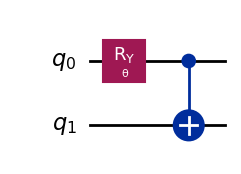

In [ ]:
# Visualize circuit
qc.draw('mpl')
plt.show()

In [ ]:
# Extract optimized parameter
optimal_params = result.optimal_point

In [ ]:
# Bind the optimal parameter to the circuit
optimal_circuit = qc.assign_parameters({theta: optimal_params[0]})

In [ ]:
# Transpile the circuit for the simulator
transpiled_circuit = transpile(optimal_circuit, simulator)

In [ ]:
# Run the transpiled circuit on the StatevectorSimulator backend to get the statevector
statevector_result = simulator.run(transpiled_circuit).result()

In [ ]:
# Retrieve the statevector
statevector = statevector_result.get_statevector()

In [ ]:
# Print results
print(f"Optimized Parameters: {optimal_params}")
print(f"Ground State Energy: {result.eigenvalue.real}")


Optimized Parameters: [4.71231296]
Ground State Energy: -1.2445844994772068


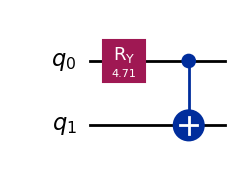

In [ ]:
# Draw optimal circuit 
optimal_circuit.draw(output='mpl')
plt.show()

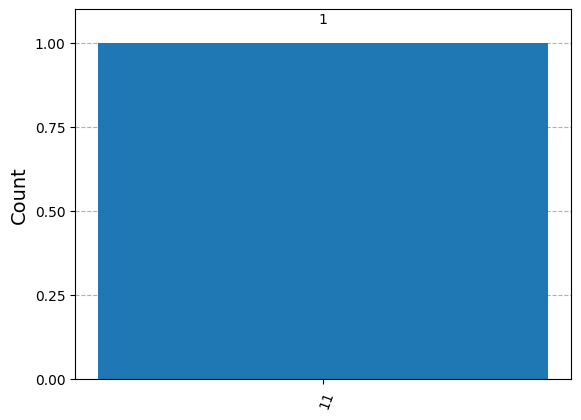

In [ ]:
# Plot the histogram of measurement outcomes
counts = simulator.run(optimal_circuit.measure_all(inplace=False)).result().get_counts()
plot_histogram(counts)
plt.show()

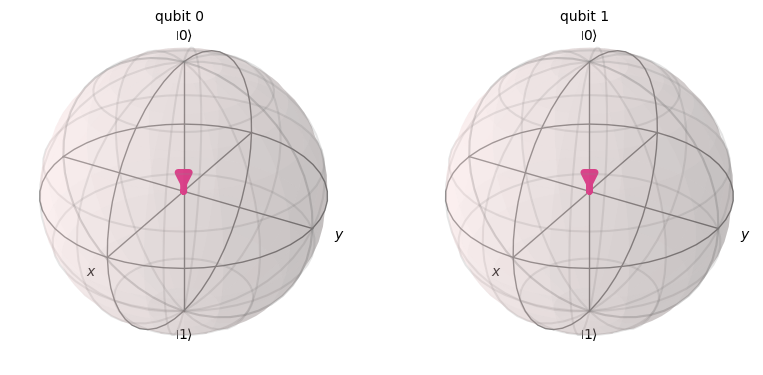

In [ ]:
# Plot the Bloch sphere representation of the final state
plot_bloch_multivector(statevector)
plt.show()

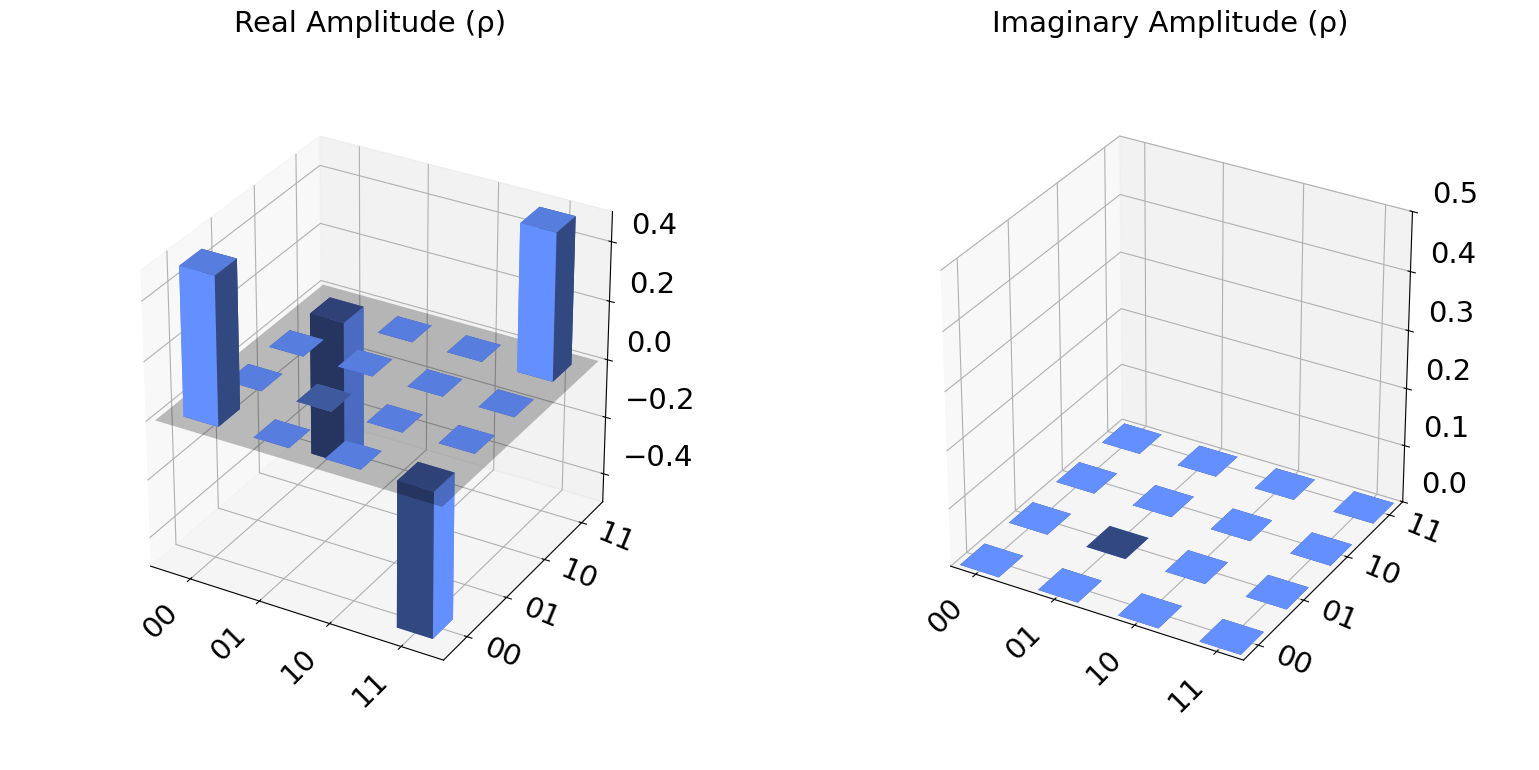

In [ ]:
# Plot the state city representation of the final state
plot_state_city(statevector)
plt.show()

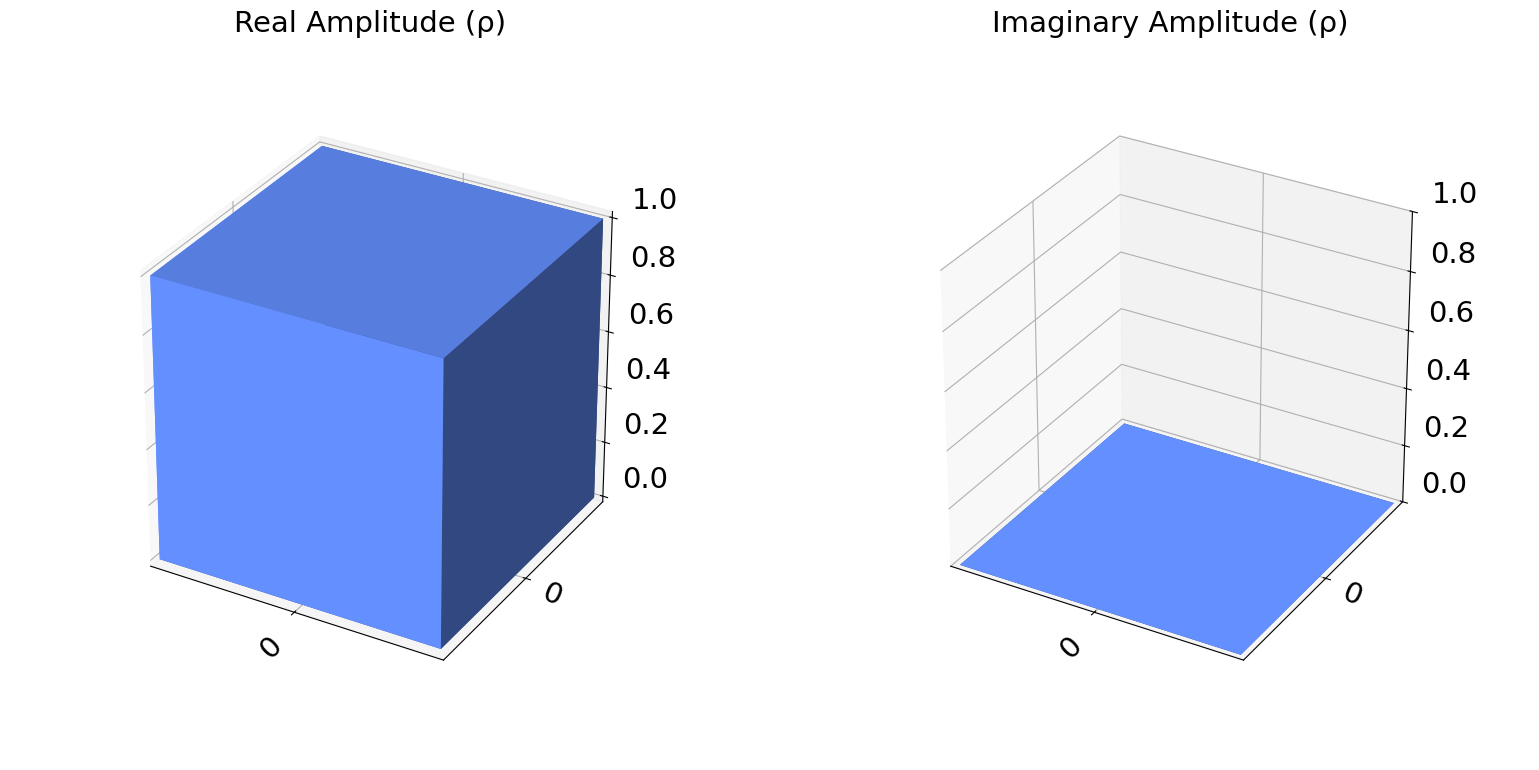

In [ ]:
# Partial trace to examine subsystems (for more complex  analysis)
subsystem_trace = partial_trace(statevector, [0, 1])
plot_state_city(subsystem_trace)
plt.show()